# 0.) Import and Clean data

In [74]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [76]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [77]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [78]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [79]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [80]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [81]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [82]:
kmeans = KMeans(n_clusters= 5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [83]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

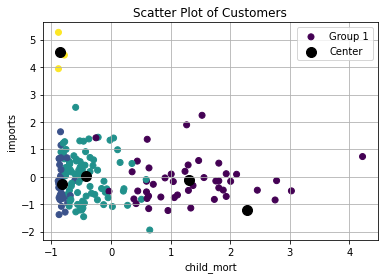

In [84]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [85]:
WCSSa = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters = k , n_init = 30)
  kmeans.fit(X_scaled)
  WCSSa.append(kmeans.inertia_)

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

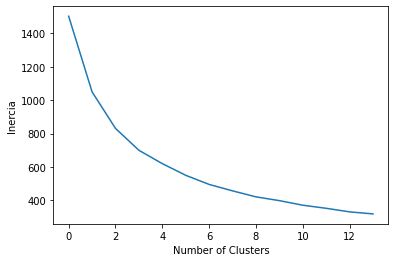

In [86]:
plt.plot(WCSSa)
plt.xlabel("Number of Clusters")
plt.ylabel("Inercia")
plt.show()

In [87]:
k = 2
kmeans = KMeans(n_clusters = k).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


As shown in the above plot, 2 numbers of clusters is an elbow point, so it may fit the model accrodingly. Besides, when choosing 2 as a clusters number, it means that we could seperate all the country into 2 groups, one is developed country and another is developing country to compared them at given labels.

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [88]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [89]:
output = pd.concat([preds,names],axis = 1)
output

,0,country
0,0,Afghanistan
1,1,Albania
2,1,Algeria
3,0,Angola
4,1,Antigua and Barbuda
...,...,...
162,0,Vanuatu
163,1,Venezuela
164,1,Vietnam
165,0,Yemen


In [90]:
print("Cluster 1:")
list(output[output[0] == 0]["country"])

Cluster 1:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

As mentioned that we divide all the data into two clusters, the above cluster 1 shown all the developing country as given two demensions "imports and "child_mort". Under these two demensions, we get the developing countries and it fit the previous steps.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [91]:
Q6df = pd.concat([preds,X], axis = 1)
Q6df

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,0,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [92]:
Q6df.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [93]:
Q6df.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# Q7.) Write an observation about the descriptive statistics.

Under the above steps that divide all the countries into developing countries and developed countries, we could find that all the variables in cluster 1, which is all the developed countries, performed better than cluster 0, which is the developing countries. We could see that in cluster1, the mean of child_mort, inflationand total_fer is less than those in cluster 0, and the number of exports, health, imports, income, life_expec and gdpp is higher than cluster 0. The comparison fit the real world situation so the clusters we divided and Kmeans we choose is not bad.